# Problem Statement: MRI Image Generation Using a Simple GAN Architecture

## Objective:
Implement a simple Generative Adversarial Network (GAN) architecture consisting of a Generator (G) and Discriminator (D) modules. Utilize a 2D Convolutional Neural Network (CNN) for the Generator and a simple Multilayer Perceptron Neural Network (MLPNN) for the Discriminator. Generate MRI (Magnetic Resonance Imaging) images using the trained GAN and compute the cross-entropy loss between actual MRI images and those generated by the Generator.

## Background:
Generative Adversarial Networks (GANs) are deep learning models used for generating synthetic data that resembles real data distributions. The Generator aims to create realistic samples while the Discriminator learns to distinguish between real and generated samples. MRI images are a type of medical imaging data widely used in diagnostic procedures.

## Task Description:
1. Design and implement a GAN architecture consisting of a 2D CNN Generator and an MLPNN Discriminator.
2. Train the GAN on a dataset of MRI images to generate synthetic MRI images.
3. Compute the cross-entropy loss between actual MRI images and those generated by the Generator to evaluate the quality of generated images.
4. Utilize ConvTranspose2d layers for upsampling the latent representations within the Generator.

## Requirements:
- Develop a GAN architecture suitable for generating MRI images.
- Choose appropriate hyperparameters for training the GAN.
- Preprocess the MRI dataset for training.
- Implement the cross-entropy loss computation between actual and generated MRI images.
- Ensure compatibility with the chosen deep learning framework and programming language.

## Deliverables:
1. Codebase containing the GAN implementation and training scripts.
2. Documentation outlining the architecture, training procedure, and evaluation metrics.
3. Evaluation results including the computed cross-entropy loss and qualitative assessment of generated MRI images.

## Evaluation Criteria:
- Quality of generated MRI images.
- Accuracy of cross-entropy loss computation.
- Clarity and organization of the documentation.
- Efficiency of the GAN training process.

## Resources:
- Dataset of MRI images suitable for training the GAN.
- Deep learning framework with support for Convolutional and Multilayer Perceptron Neural Networks.


## Notes:
- Experiment with different hyperparameters to optimize the GAN's performance.
- Consider augmenting the dataset or using techniques like data normalization to enhance training stability.
- Monitor the GAN's convergence during training to ensure effective learning.
- Cross-validate the results to verify the robustness of the trained model.


[Epoch 0/200] [Batch 0/4] [D loss: 1.3219084739685059] [G loss: 0.6939516067504883]
[Epoch 1/200] [Batch 0/4] [D loss: 1.0034373998641968] [G loss: 0.6436462998390198]
[Epoch 2/200] [Batch 0/4] [D loss: 0.9917621612548828] [G loss: 0.5761991143226624]
[Epoch 3/200] [Batch 0/4] [D loss: 1.017156958580017] [G loss: 0.6060276031494141]
[Epoch 4/200] [Batch 0/4] [D loss: 1.0336291790008545] [G loss: 0.6511474847793579]
[Epoch 5/200] [Batch 0/4] [D loss: 1.200449824333191] [G loss: 0.5876219868659973]
[Epoch 6/200] [Batch 0/4] [D loss: 1.246945858001709] [G loss: 0.6028925776481628]
[Epoch 7/200] [Batch 0/4] [D loss: 1.2863333225250244] [G loss: 0.6288971900939941]
[Epoch 8/200] [Batch 0/4] [D loss: 1.3272249698638916] [G loss: 0.6766394972801208]
[Epoch 9/200] [Batch 0/4] [D loss: 1.3230853080749512] [G loss: 0.6998866200447083]
[Epoch 10/200] [Batch 0/4] [D loss: 1.271645426750183] [G loss: 0.7530322670936584]
[Epoch 11/200] [Batch 0/4] [D loss: 1.2161962985992432] [G loss: 0.853412747383

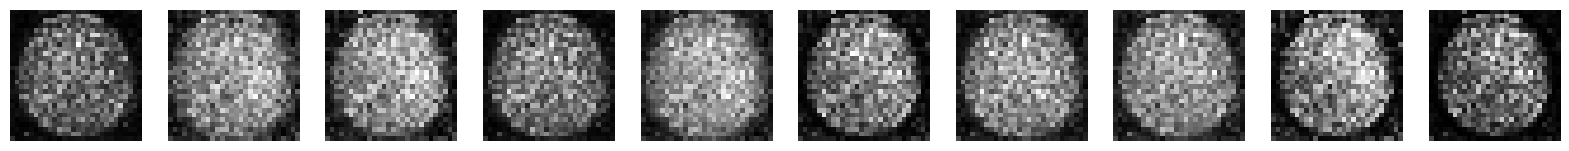

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Custom dataset class to load images from a folder
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to 28x28
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load images from the folder
dataset = CustomDataset(root_dir='C:\\Users\\ASUS\\Desktop\\GANS\\yes', transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0)


# Define generator network
class Generator(nn.Module):
    def __init__(self, latent_dim=100, output_dim=784):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

# Define discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim=784):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

# Initialize networks
latent_dim = 100
generator = Generator(latent_dim)
discriminator = Discriminator()

# Define loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Create directory to save generated images
os.makedirs('generated_images', exist_ok=True)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    for i, real_images in enumerate(data_loader):
        batch_size = real_images.size(0)
        
        # Train Discriminator
        discriminator.zero_grad()
        real_images = real_images.view(batch_size, -1)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Discriminator loss with real images
        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)
        d_loss_real.backward()

        # Generate fake images
        noise = torch.randn(batch_size, latent_dim)
        fake_images = generator(noise)

        # Discriminator loss with fake images
        fake_output = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_output, fake_labels)
        d_loss_fake.backward()

        # Update Discriminator
        d_loss = d_loss_real + d_loss_fake
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(
                f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(data_loader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]"
            )

    # Generate and save images after each epoch
    with torch.no_grad():
        num_samples = 10
        noise = torch.randn(num_samples, latent_dim)
        generated_images = generator(noise).detach().numpy()

        for j in range(num_samples):
            img = generated_images[j].reshape(28, 28)
            plt.imsave(f'generated_images/gen_{epoch+1}_{j+1}.png', img, cmap='gray')

# Visualize the last generated images
fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i in range(num_samples):
    axes[i].imshow(generated_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()


##### For each Epoch the image is generated and we can see that there is a increase the overall performance of the gans architecture